# The Search for the Next AAA Title

# Highest Rated Movie in 2020

In [1]:
import pandas as pd

In [ ]:
#define dataset
title_basics_path = "title.basics.tsv.gz"
title_ratings_path = "title.ratings.tsv.gz"

In [3]:
# Load the datasets
title_basics = pd.read_csv(title_basics_path, sep="\t", compression="gzip", dtype=str, na_values="\\N")
title_ratings = pd.read_csv(title_ratings_path, sep="\t", compression="gzip", dtype={"tconst": str, "averageRating": float, "numVotes": int})

In [4]:
#filter to 2020 movies
movies_2020 = title_basics[(title_basics["titleType"] == "movie") & (title_basics["startYear"] == "2020")]

In [12]:
#inner work
# Merge with ratings
movies_2020_rated = pd.merge(movies_2020, title_ratings, on="tconst")
movies_2020_ratedb = pd.merge(movies_2020, title_ratings, on="tconst")

### Filter for movies with at least 1000 votes ####
movies_2020_rated = movies_2020_rated[movies_2020_rated["numVotes"] >= 1000]

top_movie2 = movies_2020_ratedb.sort_values(by=["averageRating", "numVotes"], ascending=[False, False])

top_movie2.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
221,tt10261560,movie,Coffee Heroes,Coffee Heroes,0,2020,NaN,120,Documentary,10.0,6
7105,tt5653236,movie,Out There,Out There,0,2020,NaN,112,Drama,10.0,5
2580,tt11991076,movie,"For the Children, by the Children","For the Children, by the Children",0,2020,NaN,NaN,Documentary,9.9,11
5059,tt13388966,movie,A Better Life,A Better Life,0,2020,NaN,92,Drama,9.8,66
5771,tt13925132,movie,The Choice of Staying,The Choice of Staying,0,2020,NaN,48,Documentary,9.8,60


In [ ]:
# Get the top-rated movie in 2020 (balanced by numVotes)
top_movie = movies_2020_rated.sort_values(by=["averageRating", "numVotes"], ascending=[False, False]).head(5)

top_movie.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
6166,tt14888874,movie,Demon Slayer: Kimetsu no Yaiba - Mt. Natagumo Arc,Kimetsu no Yaiba: Natagumo Yama-hen,0,2020,NaN,138,"Action,Animation,Fantasy",8.7,17590
148,tt10189514,movie,Soorarai Pottru,Soorarai Pottru,0,2020,NaN,153,Drama,8.6,128768
2053,tt11737772,movie,Chal Mera Putt 2,Chal Mera Putt 2,0,2020,NaN,124,Drama,8.5,3641
3998,tt12865416,movie,30 Years and 15 Minutes,30 de ani si 15 minute,0,2020,NaN,95,"Animation,Documentary",8.5,2724
5216,tt13458600,movie,Emicida: AmarElo - It's All for Yesterday,Emicida: AmarElo - It's All for Yesterday,0,2020,NaN,89,"Documentary,Music",8.5,1693


In [9]:
#Genres Performance
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the data
title_basics_path = "title.basics.tsv.gz"
title_ratings_path = "title.ratings.tsv.gz"

# Load the datasets
title_basics = pd.read_csv(title_basics_path, sep="\t", compression="gzip", dtype=str, na_values="\\N")
title_ratings = pd.read_csv(title_ratings_path, sep="\t", compression="gzip", dtype={"tconst": str, "averageRating": float, "numVotes": int})

# Step 3: Filter to movies only
movies = title_basics[title_basics["titleType"] == "movie"]

# Step 4: Merge with ratings
movies_rated = pd.merge(movies, title_ratings, on="tconst")

# Step 5: Drop rows with missing genres
movies_rated = movies_rated.dropna(subset=["genres"])

# Step 6: Split genres and explode into multiple rows
movies_rated["genres"] = movies_rated["genres"].str.split(",")
movies_exploded = movies_rated.explode("genres")

# Step 7: Group by genre and calculate average rating
avg_rating_per_genre = movies_exploded.groupby("genres")["averageRating"].mean().reset_index()

# Step 8: Sort by average rating
avg_rating_per_genre = avg_rating_per_genre.sort_values(by="averageRating", ascending=False)

# Step 9: Display the result
avg_rating_per_genre

,genres,averageRating
18,News,7.214516
7,Documentary,7.207689
4,Biography,6.930923
12,Game-Show,6.783333
13,History,6.780296
15,Music,6.754116
22,Sport,6.615464
19,Reality-TV,6.501087
11,Film-Noir,6.446712
25,War,6.363640


# Bayesian Average
## The Bayesian Average is better for scenarios like IMDB to account for uncertainty due to small sample sizess

## Formula

## WR = (v / (v + m)) * R + (m / (v + m)) * C

## WR = Weighted Rating

## R = Average rating of the movie

## v = Number of votes for the movie

## m = Minimum votes required to be listed (e.g. 1000)

## C = Mean vote across all movies

In [14]:
import pandas as pd

# File paths
title_basics_path = "title.basics.tsv.gz"
title_ratings_path = "title.ratings.tsv.gz"

# Load data
title_basics = pd.read_csv(title_basics_path, sep='\t', compression='gzip', na_values='\\N', dtype=str)
title_ratings = pd.read_csv(title_ratings_path, sep='\t', compression='gzip', dtype={'tconst': str, 'averageRating': float, 'numVotes': int})

# Filter to only 2020 movies
movies_2020 = title_basics[
    (title_basics["titleType"] == "movie") &
    (title_basics["startYear"] == "2020")
]

# Merge with ratings
movies_2020_rated = pd.merge(movies_2020, title_ratings, on="tconst")

# Compute C (mean rating across all rated movies)
C = title_ratings["averageRating"].mean()

# Compute m (minimum number of votes to be considered)
m = title_ratings["numVotes"].quantile(0.90)

# Filter only movies that have more than m votes
qualified = movies_2020_rated[movies_2020_rated["numVotes"] >= m].copy()

# Calculate Bayesian weighted rating
qualified["weightedRating"] = (
    (qualified["numVotes"] / (qualified["numVotes"] + m)) * qualified["averageRating"]
    + (m / (qualified["numVotes"] + m)) * C
)

# Sort by weighted rating
qualified = qualified.sort_values(by="weightedRating", ascending=False)

# Display top movies
#print(qualified[["primaryTitle", "startYear", "averageRating", "numVotes", "weightedRating"]].head(10))
qualified.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,weightedRating
6166,tt14888874,movie,Demon Slayer: Kimetsu no Yaiba - Mt. Natagumo Arc,Kimetsu no Yaiba: Natagumo Yama-hen,0,2020,NaN,138,"Action,Animation,Fantasy",8.7,17590,8.653732
148,tt10189514,movie,Soorarai Pottru,Soorarai Pottru,0,2020,NaN,153,Drama,8.6,128768,8.593901
3241,tt12415546,movie,Attack on Titan: Chronicle,Shingeki no Kyojin: Chronicle,0,2020,NaN,122,"Action,Adventure,Animation",8.4,12517,8.346682
2053,tt11737772,movie,Chal Mera Putt 2,Chal Mera Putt 2,0,2020,NaN,124,Drama,8.5,3641,8.320175
7879,tt8110330,movie,Dil Bechara,Dil Bechara,0,2020,NaN,101,"Comedy,Drama,Romance",8.3,136500,8.295290
8079,tt8503618,movie,Hamilton,Hamilton,0,2020,NaN,160,"Biography,Drama,History",8.3,130455,8.295073
5332,tt13524234,movie,Taylor Swift: Folklore: The Long Pond Studio S...,Taylor Swift: Folklore - The Long Pond Studio ...,0,2020,NaN,105,"Documentary,Drama,Music",8.4,5463,8.283364
3998,tt12865416,movie,30 Years and 15 Minutes,30 de ani si 15 minute,0,2020,NaN,95,"Animation,Documentary",8.5,2724,8.268660
8160,tt8652818,movie,Violet Evergarden: The Movie,Gekijôban Vaioretto Evâgâden,0,2020,NaN,140,"Animation,Drama,Fantasy",8.3,12699,8.251038
234,tt10272386,movie,The Father,The Father,0,2020,NaN,97,"Drama,Mystery",8.2,217043,8.197253


## Performance per Genre with Bayesian

In [15]:
import pandas as pd

# File paths
title_basics_path = "title.basics.tsv.gz"
title_ratings_path = "title.ratings.tsv.gz"

# Load data
title_basics = pd.read_csv(title_basics_path, sep='\t', compression='gzip', na_values='\\N', dtype=str)
title_ratings = pd.read_csv(title_ratings_path, sep='\t', compression='gzip', dtype={'tconst': str, 'averageRating': float, 'numVotes': int})

# Merge datasets
movies = title_basics[title_basics["titleType"] == "movie"]
movies = movies.merge(title_ratings, on="tconst")

# Expand genres
movies["genres"] = movies["genres"].fillna("")
movies = movies[movies["genres"] != ""]
movies_expanded = movies.assign(genre=movies["genres"].str.split(",")).explode("genre")

# Compute global C and m for all movies
C = movies["averageRating"].mean()
m = movies["numVotes"].quantile(0.90)

# Group by genre and compute aggregates
genre_stats = movies_expanded.groupby("genre").agg(
    count=("tconst", "count"),
    numVotes=("numVotes", "sum"),
    avgRating=("averageRating", "mean")
).reset_index()

# Compute Bayesian average per genre
genre_stats["weightedRating"] = (
    (genre_stats["numVotes"] / (genre_stats["numVotes"] + m)) * genre_stats["avgRating"]
    + (m / (genre_stats["numVotes"] + m)) * C
)

# Sort genres by Bayesian weighted rating
genre_stats = genre_stats.sort_values(by="weightedRating", ascending=False)

# Display top genres
print(genre_stats[["genre", "count", "numVotes", "avgRating", "weightedRating"]].head(10))

          genre  count  numVotes  avgRating  weightedRating
7   Documentary  53635  16900554   7.207689        7.207571
18         News    682    261761   7.214516        7.206885
4     Biography  10429  78568408   6.930923        6.930905
13      History   9333  33598863   6.780296        6.780260
15        Music   8406  25160461   6.754116        6.754071
22        Sport   4184  20076140   6.615464        6.615420
11    Film-Noir    882   4132557   6.446712        6.446578
19   Reality-TV     92      8162   6.501087        6.435801
25          War   6664  27943489   6.363640        6.363626
3     Animation   5941  72327785   6.327184        6.327179


# Popular Actor

In [2]:
import pandas as pd

# Step 1: Load only movie IDs from 2020
title_basics = pd.read_csv(
    "title.basics.tsv.gz",
    sep="\t",
    compression="gzip",
    usecols=["tconst", "titleType", "startYear"],
    dtype=str,
    na_values="\\N"
)

movies_2020_ids = set(
    title_basics[
        (title_basics["titleType"] == "movie") & (title_basics["startYear"] == "2020")
    ]["tconst"]
)

# Step 2: Load ratings and filter for 2020 movie IDs
title_ratings = pd.read_csv(
    "title.ratings.tsv.gz",
    sep="\t",
    compression="gzip",
    dtype={"tconst": str, "averageRating": float, "numVotes": int}
)

ratings_2020 = title_ratings[title_ratings["tconst"].isin(movies_2020_ids)]

# Step 3: Stream `title.principals.tsv.gz` in chunks to get only actors for 2020 movies
chunksize = 100_000
actor_rows = []

for chunk in pd.read_csv(
    "title.principals.tsv.gz",
    sep="\t",
    compression="gzip",
    usecols=["tconst", "nconst", "category"],
    dtype=str,
    na_values="\\N",
    chunksize=chunksize
):
    filtered_chunk = chunk[
        (chunk["tconst"].isin(movies_2020_ids)) &
        (chunk["category"].isin(["actor", "actress"]))
    ]
    actor_rows.append(filtered_chunk)

# Concatenate all actor rows (this should now be much smaller)
actors_df = pd.concat(actor_rows, ignore_index=True)

# Merge with ratings
actors_with_votes = actors_df.merge(
    ratings_2020[["tconst", "numVotes"]],
    on="tconst",
    how="left"
)

# Step 4: Aggregate total votes per actor
actor_votes = actors_with_votes.groupby("nconst").agg(
    total_votes=pd.NamedAgg(column="numVotes", aggfunc="sum"),
    appearances=pd.NamedAgg(column="tconst", aggfunc="count")
).reset_index()

# Step 5: Load only necessary columns from names
name_basics = pd.read_csv(
    "name.basics.tsv.gz",
    sep="\t",
    compression="gzip",
    usecols=["nconst", "primaryName"],
    dtype=str,
    na_values="\\N"
)

# Merge names
top_actor = actor_votes.merge(name_basics, on="nconst").sort_values(
    by="total_votes", ascending=False
).head(10)

# Display result
print(top_actor[["primaryName", "total_votes", "appearances"]])

                 primaryName  total_votes  appearances
8041         Rich Ceraulo Ko    1280623.0            3
7406             Ivo Uukkivi     637742.0            3
3779           Andrew Howard     637230.0            2
49246      Elizabeth Debicki     637130.0            1
7632   John David Washington     637130.0            1
33923            Wes Chatham     637130.0            1
38906          Jonathan Camp     637130.0            1
35051       Robert Pattinson     637130.0            1
38258           Juhan Ulfsak     637130.0            1
39791         Jefferson Hall     637130.0            1


# Bayesian

In [3]:
import pandas as pd

# Load title.basics to get 2020 movie IDs
title_basics = pd.read_csv(
    "title.basics.tsv.gz",
    sep="\t",
    compression="gzip",
    usecols=["tconst", "titleType", "startYear"],
    dtype=str,
    na_values="\\N"
)
movies_2020 = title_basics[
    (title_basics["titleType"] == "movie") & (title_basics["startYear"] == "2020")
]["tconst"]
movie_ids_2020 = set(movies_2020)

# Load ratings
ratings = pd.read_csv(
    "title.ratings.tsv.gz",
    sep="\t",
    compression="gzip",
    dtype={"tconst": str, "averageRating": float, "numVotes": int}
)
ratings = ratings[ratings["tconst"].isin(movie_ids_2020)]

# Load title.principals in chunks to get actors for 2020 movies
chunksize = 100_000
actor_chunks = []

for chunk in pd.read_csv(
    "title.principals.tsv.gz",
    sep="\t",
    compression="gzip",
    usecols=["tconst", "nconst", "category"],
    dtype=str,
    na_values="\\N",
    chunksize=chunksize
):
    filtered = chunk[
        (chunk["tconst"].isin(movie_ids_2020)) &
        (chunk["category"].isin(["actor", "actress"]))
    ]
    actor_chunks.append(filtered)

actors_df = pd.concat(actor_chunks, ignore_index=True)

# Merge with ratings to get votes per movie per actor
actors_rated = actors_df.merge(ratings[["tconst", "numVotes"]], on="tconst", how="left")

# Group by actor
actor_stats = actors_rated.groupby("nconst").agg(
    v=("tconst", "count"),                 # appearances
    R=("numVotes", "mean"),               # average votes per movie
    total_votes=("numVotes", "sum")       # total votes
).reset_index()

# Compute global average (C) and m
C = actor_stats["R"].mean()
m = 3  # adjust as needed

# Apply Bayesian formula
actor_stats["bayesian_score"] = (
    (actor_stats["v"] / (actor_stats["v"] + m)) * actor_stats["R"] +
    (m / (actor_stats["v"] + m)) * C
)

# Load name.basics for actor names
names = pd.read_csv(
    "name.basics.tsv.gz",
    sep="\t",
    compression="gzip",
    usecols=["nconst", "primaryName"],
    dtype=str,
    na_values="\\N"
)

# Merge names
actor_scores_named = actor_stats.merge(names, on="nconst", how="left")

# Sort and show top 10
top_actors = actor_scores_named.sort_values(by="bayesian_score", ascending=False).head(10)
print(top_actors[["primaryName", "v", "R", "bayesian_score", "total_votes"]])

                 primaryName  v              R  bayesian_score  total_votes
8041         Rich Ceraulo Ko  3  426874.333333   214903.386752    1280623.0
39796         Jefferson Hall  1  637130.000000   161481.830128     637130.0
38911          Jonathan Camp  1  637130.000000   161481.830128     637130.0
33923            Wes Chatham  1  637130.000000   161481.830128     637130.0
38263           Juhan Ulfsak  1  637130.000000   161481.830128     637130.0
7632   John David Washington  1  637130.000000   161481.830128     637130.0
35051       Robert Pattinson  1  637130.000000   161481.830128     637130.0
49251      Elizabeth Debicki  1  637130.000000   161481.830128     637130.0
3779           Andrew Howard  2  318615.000000   129205.464102     637230.0
59529      Rudhraksh Jaiswal  2  281002.000000   114160.264102     281002.0


# Trend over the years

C:\Users\User\AppData\Local\Temp\ipykernel_30412\1595260147.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["startYear"] = pd.to_numeric(movies["startYear"], errors="coerce")


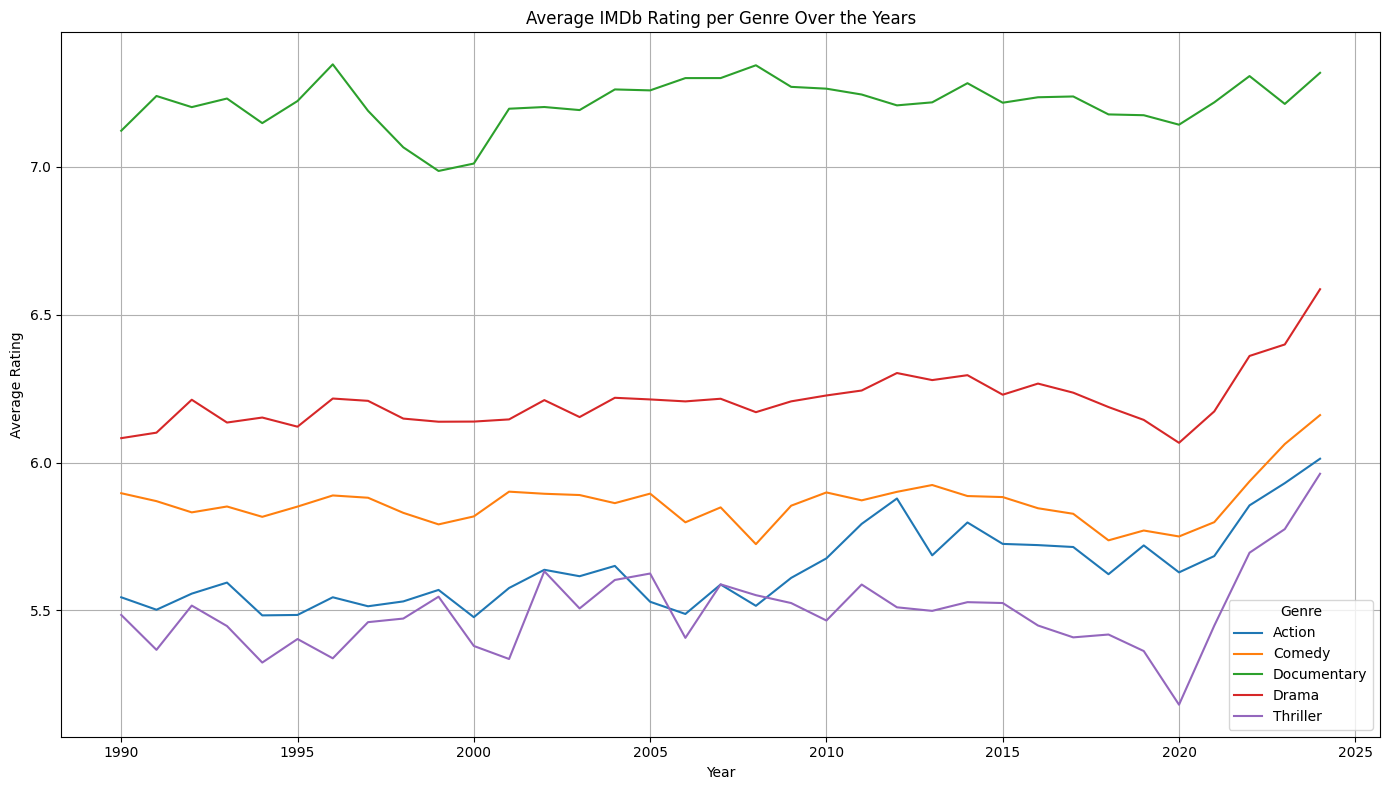

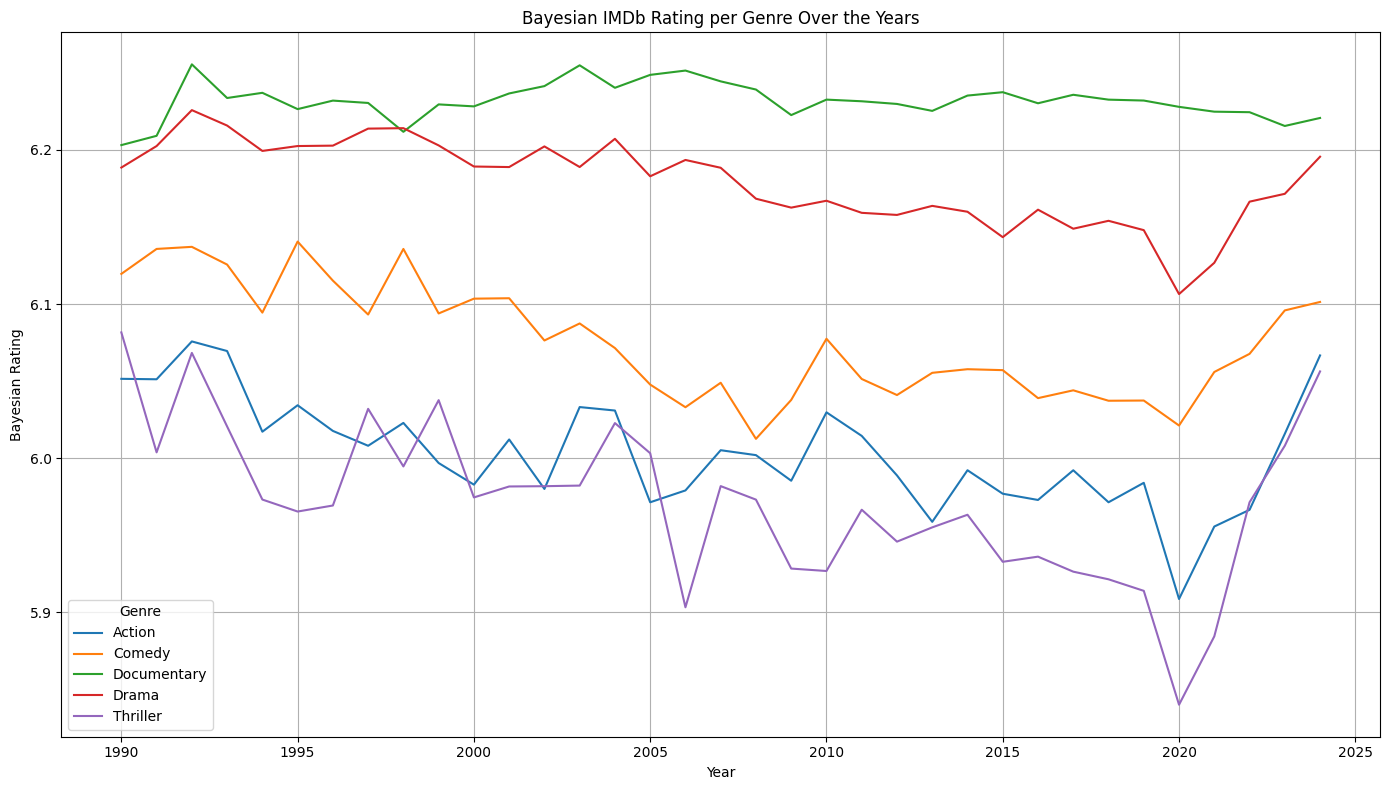

In [4]:
# IMDb Trend Analysis: Genre-Year Trends
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load IMDb data
title_basics_path = "title.basics.tsv.gz"
title_ratings_path = "title.ratings.tsv.gz"

# Read datasets
basics = pd.read_csv(title_basics_path, sep="\t", compression="gzip", dtype=str, na_values="\\N")
ratings = pd.read_csv(title_ratings_path, sep="\t", compression="gzip", dtype={"tconst": str, "averageRating": float, "numVotes": int})

# Filter for valid movies with known start year and genres
movies = basics[(basics["titleType"] == "movie") & 
                basics["startYear"].notna() & 
                basics["genres"].notna()]

# Convert startYear to int and filter reasonable years
movies["startYear"] = pd.to_numeric(movies["startYear"], errors="coerce")
movies = movies[movies["startYear"].between(1990, 2024)]

# Merge ratings
movies = pd.merge(movies, ratings, on="tconst")

# Explode genres (from "Action,Drama" → ["Action", "Drama"])
movies["genres"] = movies["genres"].str.split(",")
movies = movies.explode("genres")

# Optional: Compute Bayesian average
C = movies["averageRating"].mean()
m = 1000  # minimum votes threshold

movies["bayesianRating"] = (
    (movies["numVotes"] / (movies["numVotes"] + m)) * movies["averageRating"] +
    (m / (movies["numVotes"] + m)) * C
)

# Aggregate by genre and year
agg = movies.groupby(["startYear", "genres"]).agg({
    "tconst": "count",
    "averageRating": "mean",
    "numVotes": "sum",
    "bayesianRating": "mean"
}).rename(columns={"tconst": "movieCount"}).reset_index()

# Plotting setup
plt.figure(figsize=(14, 8))
top_genres = agg.groupby("genres")["movieCount"].sum().sort_values(ascending=False).head(5).index.tolist()
filtered_agg = agg[agg["genres"].isin(top_genres)]

# Plot average rating trend
sns.lineplot(data=filtered_agg, x="startYear", y="averageRating", hue="genres")
plt.title("Average IMDb Rating per Genre Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(title="Genre")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Plot Bayesian rating trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_agg, x="startYear", y="bayesianRating", hue="genres")
plt.title("Bayesian IMDb Rating per Genre Over the Years")
plt.xlabel("Year")
plt.ylabel("Bayesian Rating")
plt.legend(title="Genre")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load IMDb datasets
title_basics_path = "title.basics.tsv.gz"
title_ratings_path = "title.ratings.tsv.gz"

basics = pd.read_csv(title_basics_path, sep="\t", compression="gzip", dtype=str, na_values="\\N")
ratings = pd.read_csv(title_ratings_path, sep="\t", compression="gzip", dtype={"tconst": str, "averageRating": float, "numVotes": int})

# Filter valid movies
movies = basics[(basics["titleType"] == "movie") & basics["startYear"].notna() & basics["genres"].notna()]
movies["startYear"] = pd.to_numeric(movies["startYear"], errors="coerce")
movies = movies[movies["startYear"].between(1990, 2024)]

# Merge with ratings
movies = pd.merge(movies, ratings, on="tconst")

# Explode genres
movies["genres"] = movies["genres"].str.split(",")
movies = movies.explode("genres")

# Bayesian average
C = movies["averageRating"].mean()
m = 1000
movies["bayesianRating"] = (
    (movies["numVotes"] / (movies["numVotes"] + m)) * movies["averageRating"] +
    (m / (movies["numVotes"] + m)) * C
)

# Aggregate
agg = movies.groupby(["startYear", "genres"]).agg({
    "tconst": "count",
    "averageRating": "mean",
    "numVotes": "sum",
    "bayesianRating": "mean"
}).rename(columns={"tconst": "movieCount"}).reset_index()

# Top genres
top_genres = agg.groupby("genres")["movieCount"].sum().nlargest(5).index.tolist()
agg = agg[agg["genres"].isin(top_genres)]

# Plotly interactive line chart for each genre
fig = go.Figure()

for genre in top_genres:
    genre_data = agg[agg["genres"] == genre]
    
    # Left Y-axis: Bayesian rating
    fig.add_trace(go.Scatter(
        x=genre_data["startYear"], y=genre_data["bayesianRating"],
        mode="lines+markers", name=f"{genre} Rating", yaxis="y1"
    ))
    
    # Right Y-axis: Number of movies
    fig.add_trace(go.Scatter(
        x=genre_data["startYear"], y=genre_data["movieCount"],
        mode="lines", name=f"{genre} Count", yaxis="y2", line=dict(dash='dot')
    ))

# Layout
fig.update_layout(
    title="Trends in User-Movie Preferences Over Time (IMDb)",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Bayesian Rating", side="left", range=[4, 9]),
    yaxis2=dict(title="Number of Movies", overlaying="y", side="right"),
    legend=dict(orientation="h", y=-0.2),
    template="plotly_white",
    height=600
)

fig.show()


C:\Users\User\AppData\Local\Temp\ipykernel_30412\8523465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["startYear"] = pd.to_numeric(movies["startYear"], errors="coerce")


In [6]:
import pandas as pd
import plotly.graph_objs as go

# Load data
title_basics_path = "title.basics.tsv.gz"
title_ratings_path = "title.ratings.tsv.gz"

basics = pd.read_csv(title_basics_path, sep="\t", compression="gzip", dtype=str, na_values="\\N")
ratings = pd.read_csv(title_ratings_path, sep="\t", compression="gzip", dtype={"tconst": str, "averageRating": float, "numVotes": int})

# Filter for movies with valid year and genres
movies = basics[(basics["titleType"] == "movie") & basics["startYear"].notna() & basics["genres"].notna()]
movies["startYear"] = pd.to_numeric(movies["startYear"], errors="coerce")
movies = movies[movies["startYear"].between(1990, 2024)]

# Merge with ratings
movies = pd.merge(movies, ratings, on="tconst")

# Explode genres
movies["genres"] = movies["genres"].str.split(",")
movies = movies.explode("genres")

# Bayesian average calculation
C = movies["averageRating"].mean()
m = 1000
movies["bayesianRating"] = (
    (movies["numVotes"] / (movies["numVotes"] + m)) * movies["averageRating"] +
    (m / (movies["numVotes"] + m)) * C
)

# Aggregate data by year and genre
agg = movies.groupby(["startYear", "genres"]).agg({
    "averageRating": "mean",
    "bayesianRating": "mean",
    "numVotes": "sum"
}).reset_index()

# Top 10 genres only
top_genres = agg.groupby("genres")["numVotes"].sum().nlargest(10).index.tolist()
agg = agg[agg["genres"].isin(top_genres)]

# Create dropdown options and traces
fig = go.Figure()

for genre in top_genres:
    df = agg[agg["genres"] == genre]

    # Bayesian rating trace (left y-axis)
    fig.add_trace(go.Scatter(
        x=df["startYear"], y=df["bayesianRating"],
        mode="lines+markers", name=f"{genre} Rating",
        visible=(genre == top_genres[0]), yaxis="y1"
    ))

    # Vote count trace (right y-axis)
    fig.add_trace(go.Scatter(
        x=df["startYear"], y=df["numVotes"],
        mode="lines", name=f"{genre} Votes",
        visible=(genre == top_genres[0]), yaxis="y2", line=dict(dash="dot")
    ))

# Dropdown menu to toggle genre
dropdown_buttons = []
for i, genre in enumerate(top_genres):
    visibility = [False] * (2 * len(top_genres))
    visibility[2*i] = True      # rating trace
    visibility[2*i + 1] = True  # vote trace
    dropdown_buttons.append(
        dict(label=genre, method="update", args=[{"visible": visibility},
             {"title": f"User Preferences Over Time – {genre}"}])
    )

# Update layout
fig.update_layout(
    title=f"User Preferences Over Time – {top_genres[0]}",
    xaxis=dict(title="Year", rangeslider=dict(visible=True)),
    yaxis=dict(title="Bayesian Rating", side="left", range=[4, 9]),
    yaxis2=dict(title="Number of Votes", overlaying="y", side="right"),
    updatemenus=[dict(active=0, buttons=dropdown_buttons, x=0.1, y=1.2)],
    height=600,
    template="plotly_white",
    legend=dict(orientation="h", y=-0.25)
)

fig.show()


C:\Users\User\AppData\Local\Temp\ipykernel_30412\2244920393.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

